<a href="https://colab.research.google.com/github/Arslonbekjon/Regression/blob/main/Simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
URL = "https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv"
df = pd.read_csv(URL)

dfs = df[df['size']=="Площадьземли:1сот"].index
df.drop(dfs,inplace=True)
df['size'] = df['size'].astype(float)
dfss = df[df['size']>200].index
df.drop(dfss, inplace=True)

dfp = df[df['price']=="Договорная"].index
df.drop(dfp,inplace=True)
df['price'] = df['price'].astype(float)
dfpp = df[df['price']>200_000].index
df.drop(dfpp,inplace=True)

df.drop('location',axis=1,inplace=True)
housing = df[df['district']=="Чиланзарский"]



housing.head(10)

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
9,Чиланзарский,1,30.0,1,4,22200.0
11,Чиланзарский,3,67.0,2,5,30200.0
12,Чиланзарский,1,30.0,2,4,21200.0
13,Чиланзарский,1,30.0,2,4,21200.0
14,Чиланзарский,1,30.0,2,4,21200.0


2       42.0
3       65.0
4       70.0
5       28.0
6       30.0
        ... 
7504    70.0
7522    20.0
7533    32.0
7545    70.0
7564    30.0
Name: size, Length: 1631, dtype: float64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
"""a = housing[housing['price']>1000000].index
housing.drop(a, inplace=True)

b = housing[housing['size']>150].index
housing.drop(b, inplace=True)"""

In [20]:
X = housing['size']
X

2       42.0
3       65.0
4       70.0
5       28.0
6       30.0
        ... 
7504    70.0
7522    20.0
7533    32.0
7545    70.0
7564    30.0
Name: size, Length: 1612, dtype: float64

In [21]:
y = housing['price']
y

2       37000.0
3       49500.0
4       55000.0
5       25500.0
6       21200.0
         ...   
7504    48000.0
7522    18500.0
7533    28000.0
7545    49800.0
7564    22914.0
Name: price, Length: 1612, dtype: float64

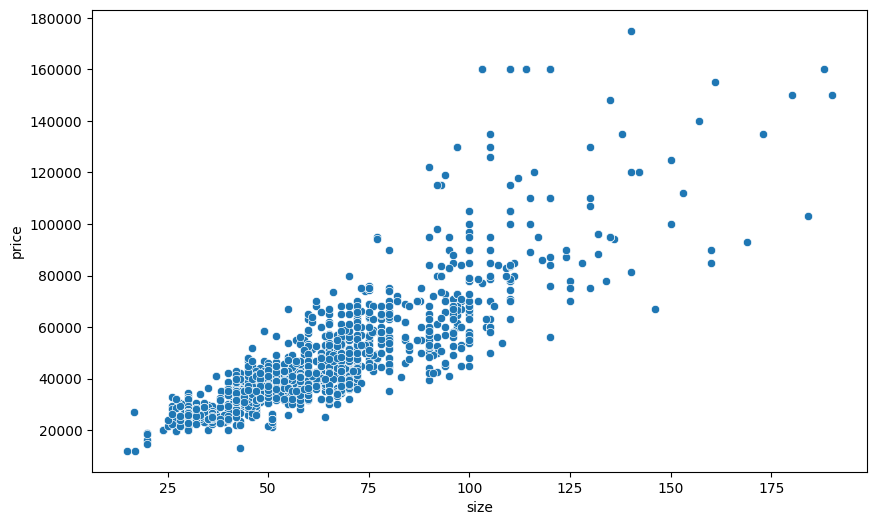

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

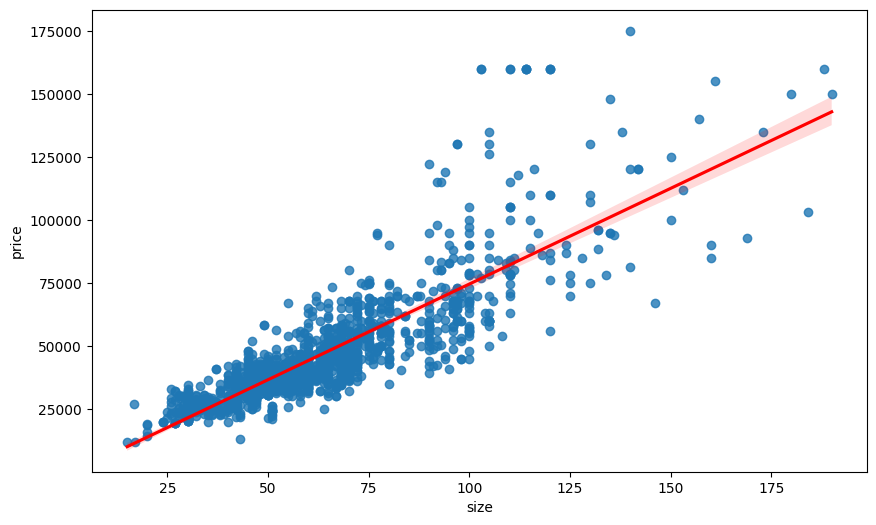

In [23]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

#Vazifani boshlaymiz

In [24]:
X = housing['size'].to_numpy()
X

array([42., 65., 70., ..., 32., 70., 30.])

In [25]:
y = housing['price'].to_numpy()
y

array([37000., 49500., 55000., ..., 28000., 49800., 22914.])

#Narx va uy maydoni o'rtasidagi bog'liqlik bor ekanini tekshirib ko'ramiz

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

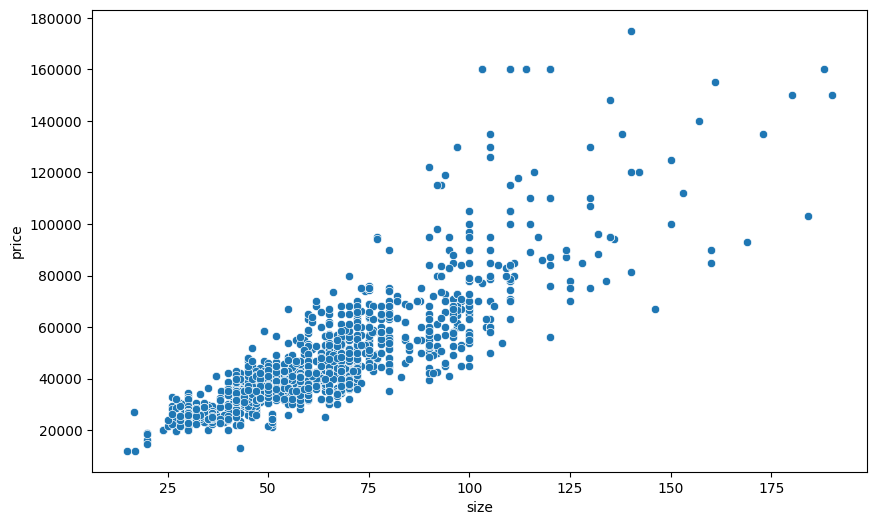

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

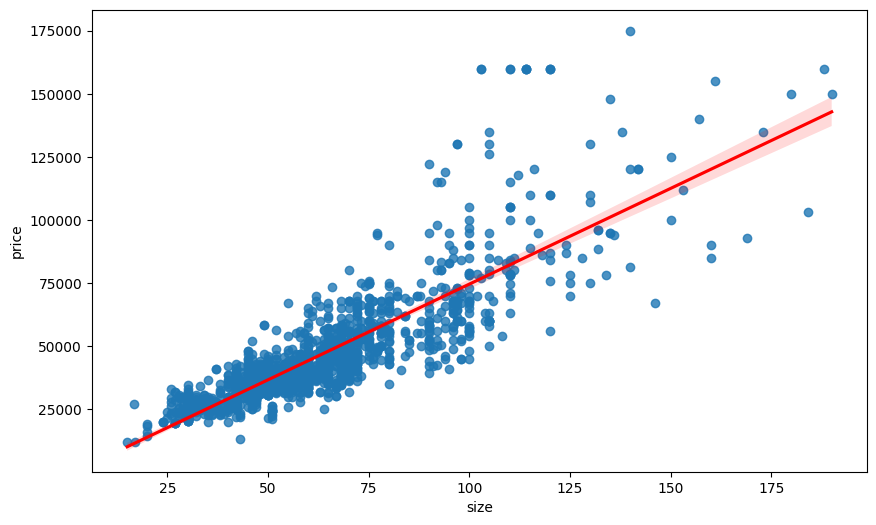

In [28]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing,x='size',y='price',line_kws={"color":"red"})
plt.show()

In [29]:
import numpy as np

Xmean = np.mean(X)
ymean = np.mean(y)

In [30]:
tilda1 = sum((X-Xmean)*(y-ymean))/sum((X-Xmean)**2)
print(f"{tilda1=}")

tilda1=758.5711278869543


In [31]:
tilda0 = ymean - tilda1*Xmean
print(f"{tilda0=}")

tilda0=-1282.4264363443435


#2-VAZIFA

In [32]:
X_test = housing.sample(10,random_state = 42)['size'].to_numpy()
print(f"{X_test=}")
y_test = housing.sample(10,random_state=42)['price'].to_numpy()
print(f"{y_test=}")

X_test=array([ 82.,  58.,  30.,  30.,  28.,  48., 104.,  30.,  61.,  43.])
y_test=array([70000., 35000., 23000., 26300., 23999., 34500., 63000., 26700.,
       51500., 42000.])


In [34]:
y_predict = tilda0 + tilda1*X_test
print(f"{y_predict=}")


y_predict=array([60920.40605039, 42714.6989811 , 21474.70740026, 21474.70740026,
       19957.56514449, 35128.98770223, 77608.9708639 , 21474.70740026,
       44990.41236476, 31336.13206279])


#MSE va RMSE larni hisoblaymiz

In [35]:
MAE = np.sum(np.absolute(y_predict-y_test))/len(y_test)
print(f"{MAE=}")

MAE=6482.301972400366


In [36]:
RMSE = np.sqrt(np.sum((y_predict-y_test)**2)/len(y_test))
print(f"{RMSE=}")

RMSE=7623.076262807042


#Scikit-learn yordamida LR

In [37]:
housing.shape

(1612, 6)

In [38]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing,test_size=0.10,random_state=42)

#Linear Regression ML

In [39]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

# Modelni o'qitamiz(train)
LR_model.fit(x_train,y_train)

# tilda1 va tilda0 larning koeffitsiyentlarini ajratib olamiz
tilda1 = LR_model.coef_[0][0]
tilda0 = LR_model.intercept_[0]
print(f"{tilda1=}")
print(f"{tilda0=}")




tilda1=758.9597393929148
tilda0=-1500.1834779364217


Text(0, 0.5, 'Price')

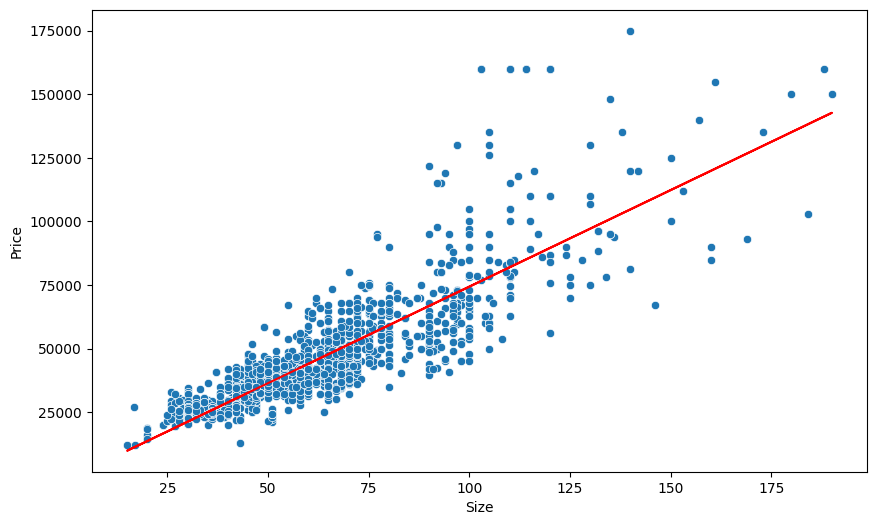

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size',y='price')
plt.plot(x_train,tilda1*x_train + tilda0, '-r')

plt.xlabel("Size")
plt.ylabel('Price')

# Modelni baholaymiz

In [41]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])

In [42]:
y_predict = LR_model.predict(x_test)

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test,y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=6892.067146836659
RMSE=10653.068082355181
